Task 3 – Edge/Contour Detection (AA2.6, AA3.2)


You will be provided with an RGB image containing a satellite image of the Aeolian Islands situated above Sicily. (Sample 1),

called Aeolean_sentinel2.png (Do not forget to load any required packages)


Create an algorithm which draws contours around the edges of the islands and displays the number of islands in the image as follows:

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

a) Read ‘Aeolean_sentinel2.png’ and display the satellite image.

b) Convert to grayscale.

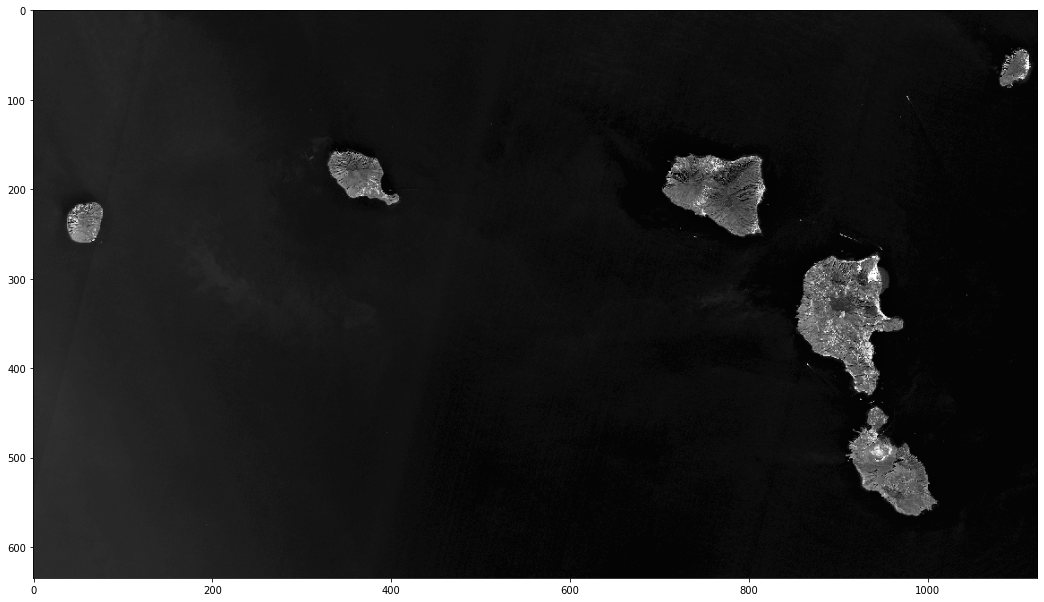

In [16]:
img = cv2.imread('Aeolean_sentinel2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(18, 18))
plt.imshow(grey, cmap='gray')
plt.show()

c) Convert the grayscale image into a binary image using a threshold of 50 and a maximum value of 255. (Sample 2)

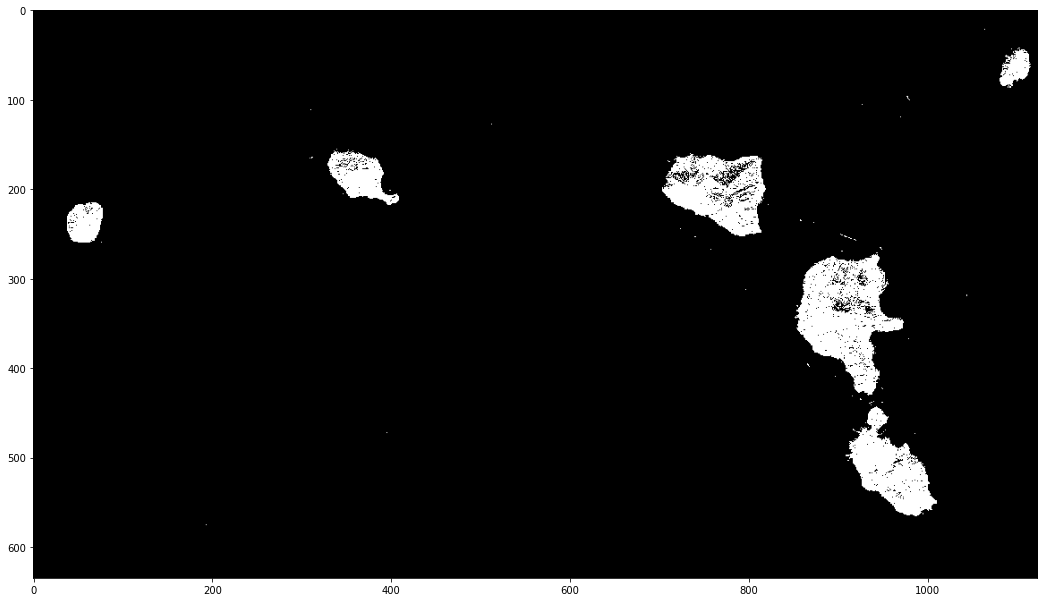

In [17]:
_, binary = cv2.threshold(grey, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(18, 18))
plt.imshow(binary, cmap='gray')
plt.show()

d)      Apply morphological opening using a 3x3 structural element to clean up the image from unwanted artifacts/noise.

e)      Apply morphological closing using a 15x15 structural element to clean up the image from unwanted artifacts/noise.

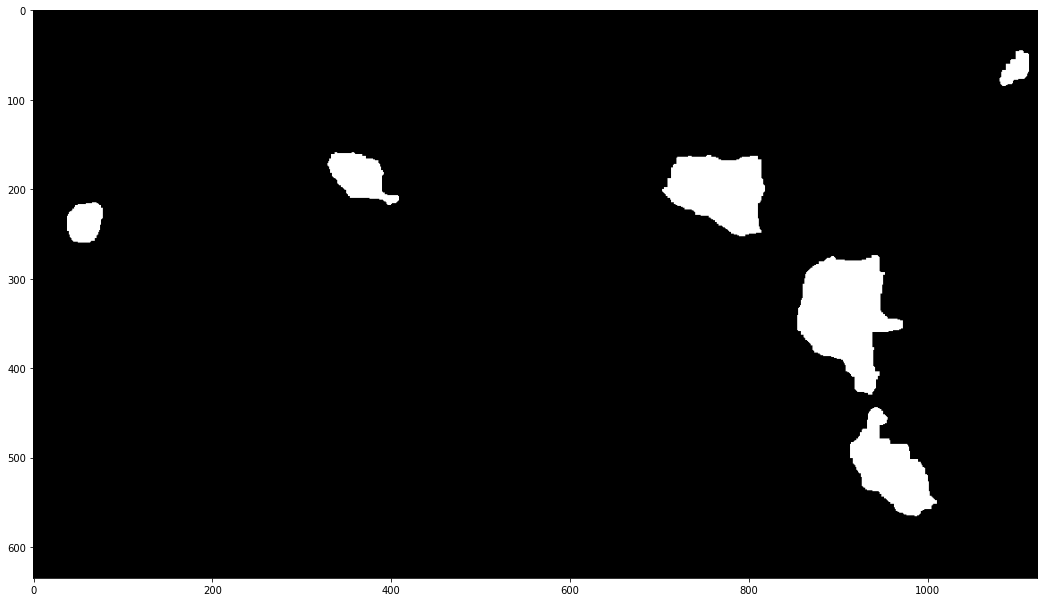

In [18]:
open = np.ones((3,3), np.uint8)
close = np.ones((15, 15), np.uint8)

imgMorph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, open)
imgMorph = cv2.morphologyEx(imgMorph, cv2.MORPH_CLOSE, close)

plt.figure(figsize=(18, 18))
plt.imshow(imgMorph, cmap='gray')
plt.show()

f) Use the cv2.findContours() function to retrieve all contours in the image.

In [19]:
contours,hierarchy = cv2.findContours(imgMorph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

[array([[[ 940,  444]],

       [[ 939,  445]],

       [[ 938,  445]],

       [[ 937,  446]],

       [[ 936,  446]],

       [[ 936,  447]],

       [[ 934,  449]],

       [[ 934,  450]],

       [[ 933,  451]],

       [[ 933,  457]],

       [[ 932,  458]],

       [[ 932,  467]],

       [[ 931,  468]],

       [[ 927,  468]],

       [[ 926,  469]],

       [[ 926,  471]],

       [[ 925,  472]],

       [[ 924,  472]],

       [[ 924,  475]],

       [[ 922,  477]],

       [[ 922,  478]],

       [[ 921,  479]],

       [[ 920,  479]],

       [[ 920,  480]],

       [[ 919,  481]],

       [[ 918,  481]],

       [[ 916,  483]],

       [[ 914,  483]],

       [[ 914,  484]],

       [[ 913,  485]],

       [[ 913,  500]],

       [[ 915,  500]],

       [[ 916,  501]],

       [[ 916,  506]],

       [[ 919,  509]],

       [[ 919,  510]],

       [[ 920,  511]],

       [[ 920,  513]],

       [[ 922,  515]],

       [[ 922,  516]],

       [[ 923,  517]],

       [[ 924, 

g) Iterate through the list of contours to draw the contours around the edge of each island using cv2.drawContours()

h) Use len() function on the contours list, or keep a record of the number of contour iterations to count number of islands.

i) Display the result (Sample 4) and print out the number of islands in the console.

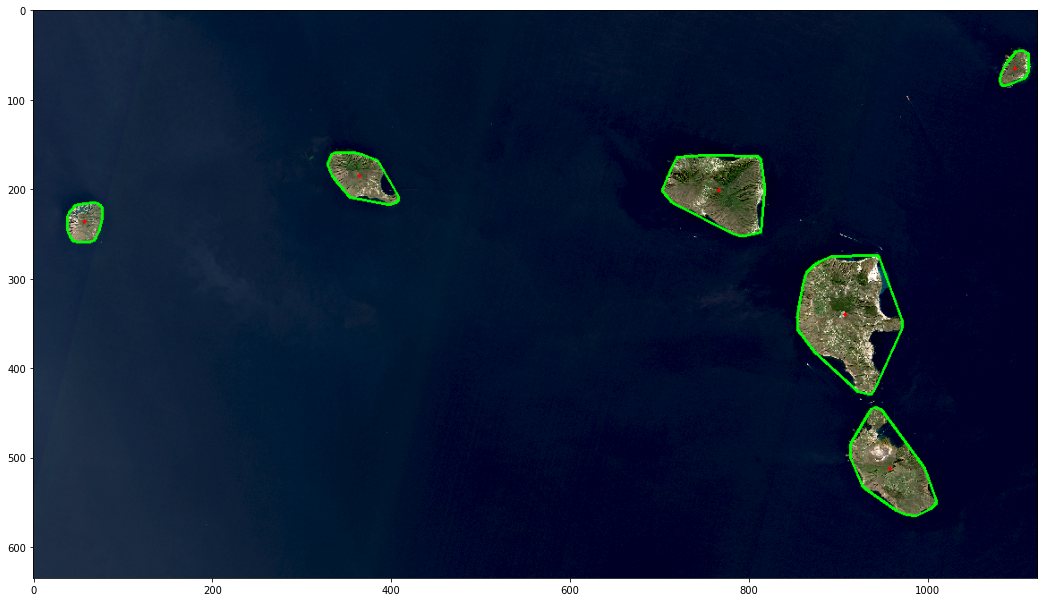

contour count: 6


In [22]:
count = 0

for c in contours:
    M = cv2.moments(c)
    cX = int(M['m10']/M['m00'])
    cY = int(M['m01']/M['m00'])
    hull = cv2.convexHull(c)
    cv2.circle(img, (cX, cY), 2, (255, 0, 0), -1)
    cv2.drawContours(img, [hull], 0, (0, 255, 0), 2)
    count += 1

plt.figure(figsize=(18, 18))
plt.imshow(img)
plt.show()

print("contour count:", count)